# General Users and Mentions Word CLoud (users_cloud.py and mentions_cloud.py)

We've used the following packages

In [1]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk

Read the JSON

In [2]:
data = []
with open('general_result.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))


Filter the users and calculate the frequency distribution

In [4]:
index_users=0
cmt_list_users = []
for element in data:
    token_users=data[index_users]['user']['screen_name']
    cmt_list_users.append(token_users)
    index_users=index_users+1

fdist_users = dict(nltk.FreqDist(cmt_list_users))

Filter the mentions and calculate the frequency distribution

In [5]:
index_mentions=0
cmt_list_mentions = []
for element in data:
    for entity in data[index_mentions]['entities']['user_mentions']:
        token_mentions=entity['screen_name']
        cmt_list_mentions.append(token_mentions)
    index_mentions=index_mentions+1


fdist_mentions = dict(nltk.FreqDist(cmt_list_mentions))

Users Word Cloud

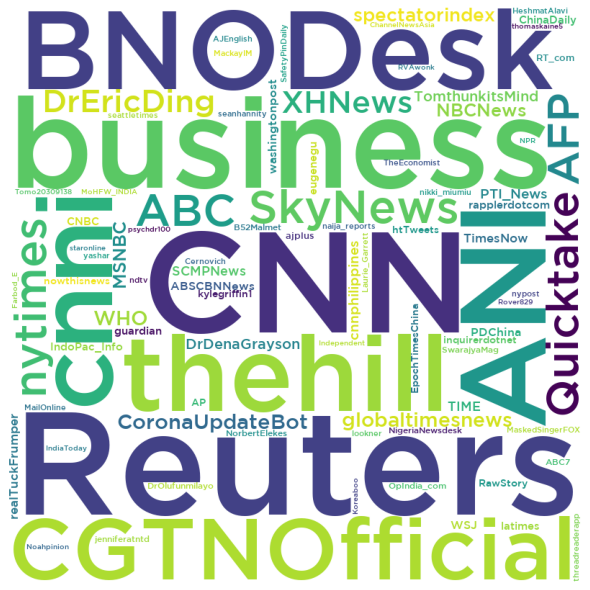

In [6]:
wordcloud_users = WordCloud(width = 800, height = 800, 
               background_color ='white', 
                font_path = 'GothamMedium.ttf',
                min_word_length = 3,
               min_font_size = 10).generate_from_frequencies(fdist_users) 


#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_users) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

Mentions Word Cloud

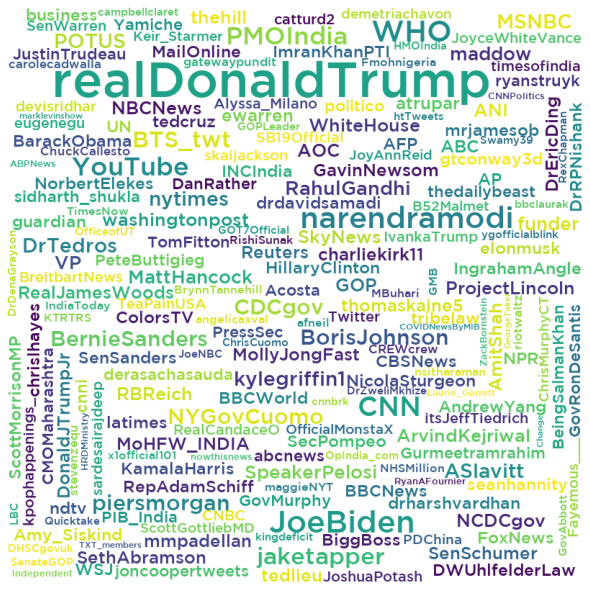

In [8]:
wordcloud_mentions = WordCloud(width = 800, height = 800, 
               background_color ='white', 
                min_word_length = 3,
                font_path = 'GothamMedium.ttf',
               min_font_size = 10).generate_from_frequencies(fdist_mentions) 

#plot the WordCloud image                        

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_mentions) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 